## KNN 

**KNN**

*Autor: Danillo de Souza*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

**Importando Data Frame**

In [2]:
df = pd.read_csv('dataframes/cancer.csv', sep=',')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
del df['id']
del df['Unnamed: 32']

In [4]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [5]:
idCat, cat = pd.factorize(df['diagnosis'])
# M = 0 // B = 1

df['diagnosisCat'] = idCat
del df['diagnosis']
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosisCat
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**Análise Exploratória**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [7]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosisCat
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<AxesSubplot:xlabel='diagnosisCat', ylabel='count'>

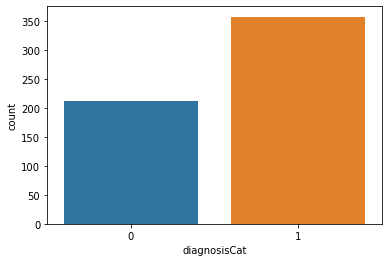

In [8]:
sns.countplot(x='diagnosisCat',data=df)

In [9]:
df['diagnosisCat'].value_counts()

1    357
0    212
Name: diagnosisCat, dtype: int64

**Divisão dos Dados de Treino e Teste**

In [10]:
X = df.drop('diagnosisCat', axis=1)
Y = df['diagnosisCat']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [11]:
X_train.shape

(455, 30)

In [12]:
X_test.shape

(114, 30)

**Escalonamento dos Dados**

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = sc.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.128480,0.412526,1.402228,1.031462,1.975007,3.068062,3.120413,1.932435,1.189652,1.245867,...,1.015762,0.364130,1.359441,0.842653,2.550073,2.242113,3.216248,1.308643,0.645856,2.101824
1,0.094486,-1.353479,0.057124,-0.004715,0.213574,-0.532944,-0.381926,-0.048793,1.043855,-1.231538,...,0.150783,-1.431493,0.142861,0.034676,-0.093046,-0.636806,-0.499597,-0.064015,0.327738,-1.320822
2,1.780158,0.094411,1.684830,1.853825,-1.174088,-0.346302,0.397888,0.789946,0.479854,-1.754661,...,1.500837,-0.419805,1.378062,1.504714,-1.208111,-0.628940,-0.010644,0.465014,0.315569,-1.401348
3,-0.849722,-1.063433,-0.883478,-0.793302,0.326882,-0.906428,-0.831799,-0.591301,-0.909047,0.583046,...,-1.012539,-1.444697,-1.048579,-0.859388,-0.464734,-1.096305,-1.121180,-1.091395,-1.688746,-0.601881
4,-0.519539,0.183296,-0.492896,-0.557166,0.989075,0.240629,-0.053858,-0.703294,1.231856,0.917429,...,-0.624049,-0.231660,-0.641398,-0.636576,0.388773,-0.118967,0.455720,-0.499447,-0.285899,0.282168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-1.325881,-0.219025,-1.321723,-1.069674,0.348955,-0.864135,-0.785352,-0.907406,-1.139251,1.014028,...,-0.868733,-0.091377,-0.931266,-0.778553,0.072149,-0.948819,-0.744576,-0.974633,-0.729178,-0.125097
110,0.966285,0.889699,0.837023,0.852598,-0.701724,-0.797818,-0.761125,-0.523085,-0.916720,-1.441085,...,0.811858,0.973124,0.695288,0.681358,-0.354604,-0.662370,-0.710941,-0.476438,-0.732654,-1.064181
111,-0.284935,-0.195634,-0.360453,-0.349520,-0.465542,-1.298972,-0.805162,-0.499988,-1.288884,-0.614787,...,-0.594001,-0.456113,-0.662191,-0.579184,-1.593107,-1.333659,-1.076251,-0.980738,-1.540986,-1.264627
112,1.226956,0.169262,1.199766,1.166564,-0.112372,0.117524,0.360410,0.702392,-0.034269,-0.794611,...,1.462202,0.344326,1.471168,1.409062,0.572323,0.052116,0.580719,1.258557,0.329476,0.009306


**Melhores Hiperparâmetros**

In [14]:
params = [
    {
        'C':[0.1,1,10,100,100],
        'gamma':[0.1,1,10,100,100]
    }
]

modelo_svm = SVC(gamma=0.1)
# grid_search = GridSearchCV(modelo_svm, params, cv=10)
# grid_search.fit(X_train, Y_train)
# grid_search.best_params_

**Ajustando e Fazendo Predições**

In [15]:
modelo_svm.fit(X_train, Y_train)
pred = modelo_svm.predict(X_test)
pred[:5]

array([0, 1, 0, 1, 1], dtype=int64)

In [16]:
Y_test[:5].values

array([0, 1, 0, 1, 1], dtype=int64)

**Testando o Desempenho**

In [17]:
modelo_svm.score(X_test, Y_test)

0.956140350877193

In [18]:
cross = cross_val_score(modelo_svm, X_test, Y_test, cv=10, scoring='accuracy')
final = sum(cross) / len(cross)
final

0.9477272727272726

In [19]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        49
           1       0.95      0.97      0.96        65

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.96       114
weighted avg       0.96      0.96      0.96       114



In [20]:
print(confusion_matrix(Y_test, pred))

[[46  3]
 [ 2 63]]
